In [30]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import requests

In [5]:
file_path = "wildfire.csv"
df = pd.read_csv(file_path)

In [6]:
wildfire_df = pd.DataFrame(df)
wildfire_df

,YEAR,NFIREID,BASRC,FIREMAPS,FIREMAPM,FIRECAUS,BURNCLAS,SDATE,EDATE,AFSDATE,AFEDATE,CAPDATE,POLY_HA,ADJ_HA,ADJ_FLAG,AGENCY,BT_GID,VERSION,COMMENTS
0,1986.0,208.0,1.0,9.0,7.0,2.0,4.0,NaN,NaN,1986-07-10,NaN,1986-09-12,3408.092664,3408.092664,0.0,NT,12.0,1986_r9_20210810,Null
1,1986.0,31.0,1.0,9.0,7.0,4.0,4.0,NaN,NaN,1986-05-14,NaN,1986-06-20,2767.768044,2767.768044,0.0,NB,8.0,1986_r9_20210810,Null
2,1986.0,159.0,3.0,0.0,2.0,4.0,4.0,NaN,NaN,1986-05-28,NaN,NaN,49.268235,53.316641,2.0,BC,241.0,1986_r9_20210810,"G70001[load_date:20070517000000,method:digitis..."
3,1986.0,102.0,3.0,0.0,2.0,4.0,4.0,NaN,NaN,1986-10-20,NaN,NaN,6.743968,7.880180,2.0,BC,269.0,1986_r9_20210810,"C50101[load_date:20070517000000,method:digitis..."
4,1986.0,13.0,1.0,9.0,7.0,2.0,4.0,NaN,NaN,1986-05-27,NaN,1986-07-30,1882.734463,1882.734463,0.0,QC,17.0,1986_r9_20210810,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36912,2021.0,2760.0,3.0,0.0,0.0,3.0,4.0,NaN,NaN,2021-04-15,NaN,NaN,42.766376,46.533948,2.0,PC-JA,900.0,2021_r9_20220624,"2021JA011[notes:,NAME:Henry House Grass Prescr..."
36913,2021.0,2884.0,3.0,0.0,5.0,2.0,4.0,NaN,NaN,2021-07-25,NaN,NaN,0.397974,0.518680,2.0,MB,998.0,2021_r9_20220624,"EA180[sourcekeys:,creatmethd:,waterrem:,unburn..."
36914,2021.0,2891.0,3.0,0.0,0.0,4.0,4.0,NaN,NaN,2021-04-10,NaN,NaN,281.061614,284.391917,2.0,MB,1445.0,2021_r9_20220624,"EA014[sourcekeys:,creatmethd:,waterrem:,unburn..."
36915,2021.0,2861.0,3.0,0.0,5.0,4.0,4.0,NaN,NaN,2021-07-26,NaN,NaN,0.099511,0.136818,2.0,MB,1304.0,2021_r9_20220624,"WE076[sourcekeys:,creatmethd:,waterrem:,unburn..."


In [18]:
wildfire = wildfire_df[['YEAR','NFIREID','BURNCLAS','AFSDATE','CAPDATE','POLY_HA','AGENCY']]
wildfire

,YEAR,NFIREID,BURNCLAS,AFSDATE,CAPDATE,POLY_HA,AGENCY
0,1986.0,208.0,4.0,1986-07-10,1986-09-12,3408.092664,NT
1,1986.0,31.0,4.0,1986-05-14,1986-06-20,2767.768044,NB
2,1986.0,159.0,4.0,1986-05-28,NaN,49.268235,BC
3,1986.0,102.0,4.0,1986-10-20,NaN,6.743968,BC
4,1986.0,13.0,4.0,1986-05-27,1986-07-30,1882.734463,QC
...,...,...,...,...,...,...,...
36912,2021.0,2760.0,4.0,2021-04-15,NaN,42.766376,PC-JA
36913,2021.0,2884.0,4.0,2021-07-25,NaN,0.397974,MB
36914,2021.0,2891.0,4.0,2021-04-10,NaN,281.061614,MB
36915,2021.0,2861.0,4.0,2021-07-26,NaN,0.099511,MB


In [29]:
#Calcualte number of fire per year
fires_per_year = pd.DataFrame(wildfire_df.groupby('YEAR')['NFIREID'].count())
fires_per_year

,NFIREID
YEAR,
1986.0,352
1987.0,534
1988.0,535
1989.0,1170
1990.0,507
1991.0,568
1992.0,327
1993.0,365
1994.0,701


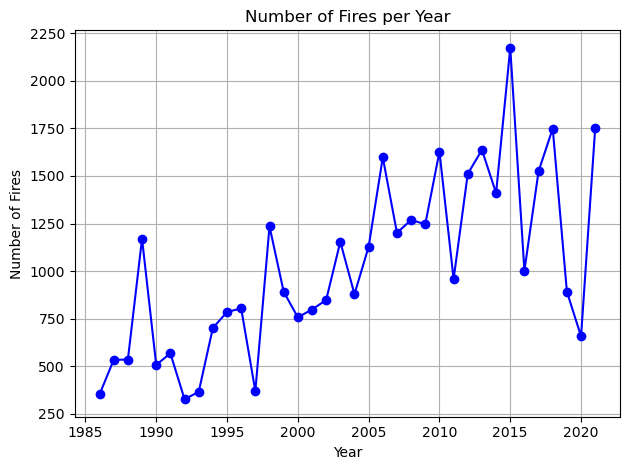

In [28]:
# Plotting the line chart
plt.plot(fires_per_year.index, fires_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Year')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
url = 'https://api.openweathermap.org/data/2.5/weather?q=Canada&appid=34d496f17997ddda8b83d8de4271b05f'
response = requests.get(url)
response.json()

{'coord': {'lon': -0.8141, 'lat': 38.6767},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 297.35,
  'feels_like': 296.82,
  'temp_min': 294.7,
  'temp_max': 298.71,
  'pressure': 1012,
  'humidity': 38,
  'sea_level': 1012,
  'grnd_level': 950},
 'visibility': 10000,
 'wind': {'speed': 1.86, 'deg': 256, 'gust': 2.37},
 'clouds': {'all': 6},
 'dt': 1689902854,
 'sys': {'type': 2,
  'id': 2011177,
  'country': 'ES',
  'sunrise': 1689915294,
  'sunset': 1689967440},
 'timezone': 7200,
 'id': 6355428,
 'name': 'Cañada',
 'cod': 200}